In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
from matplotlib.pylab import rcParams
rcParams['font.family']='AppleGothic'
rcParams['figure.figsize']=17,8

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
test=pd.read_csv('titanic.csv', index_col=0)
print(test.shape)
test.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.shape

(891, 11)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


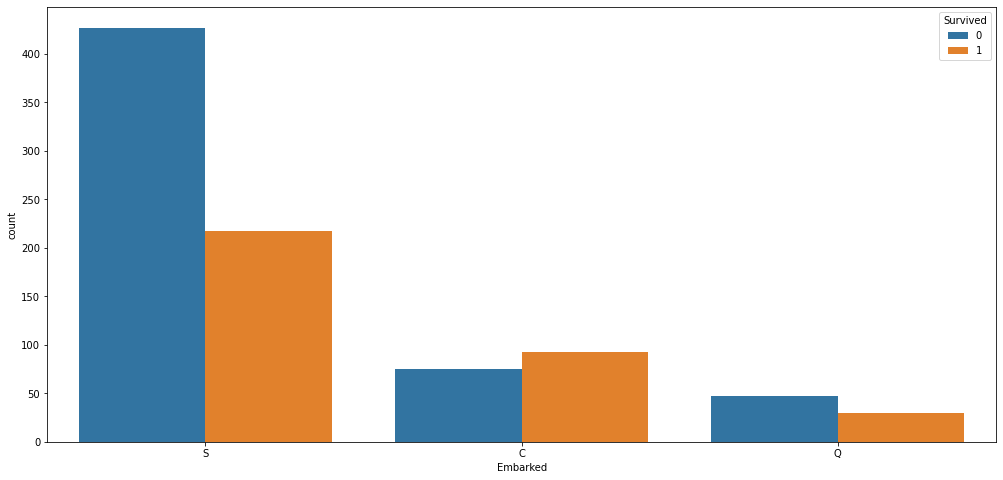

In [6]:
sns.countplot(data=test, x='Embarked',  hue='Survived')

In [7]:
#Embarked 칼럼에서 결츨치가 있는 데이터 확인
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
#Embarked의 값이 'S'인 데이터 확안
test.loc[test.Embarked.isnull(),'Embarked'] = 's' 

In [9]:
test.Embarked=test.Embarked.fillna("s") 

In [10]:
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


### Q.각각의 승선의 위치마다 승객이 몇명이 탔을까요? %로 나타내시오.

In [17]:
test.Embarked.value_counts()/test.shape[0]*100


S    72.278339
C    18.855219
Q     8.641975
s     0.224467
Name: Embarked, dtype: float64

In [18]:
test.shape[0]

891

<AxesSubplot:xlabel='Sex', ylabel='count'>

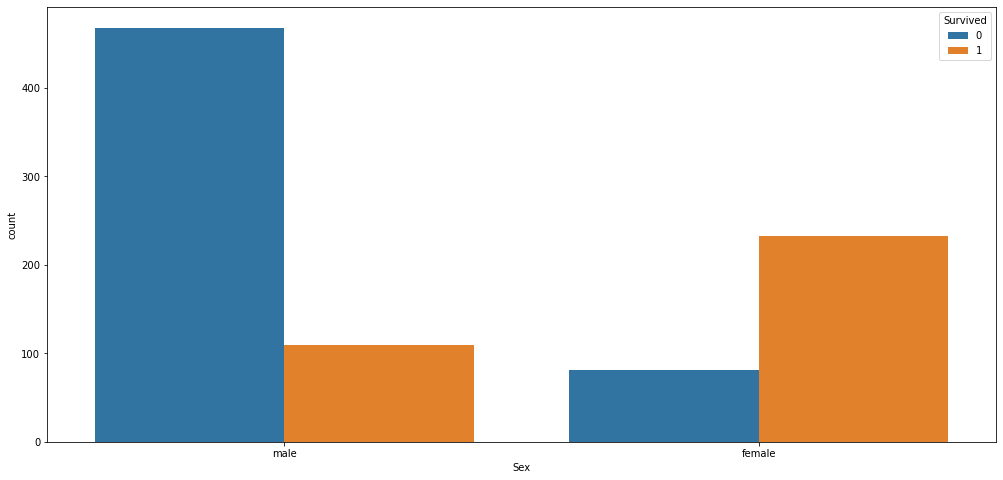

In [25]:
#성별에 따라 사람들이 얼마나 생존됐는지 알아보기(시각화)
sns.countplot(data=test, x = 'Sex',hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

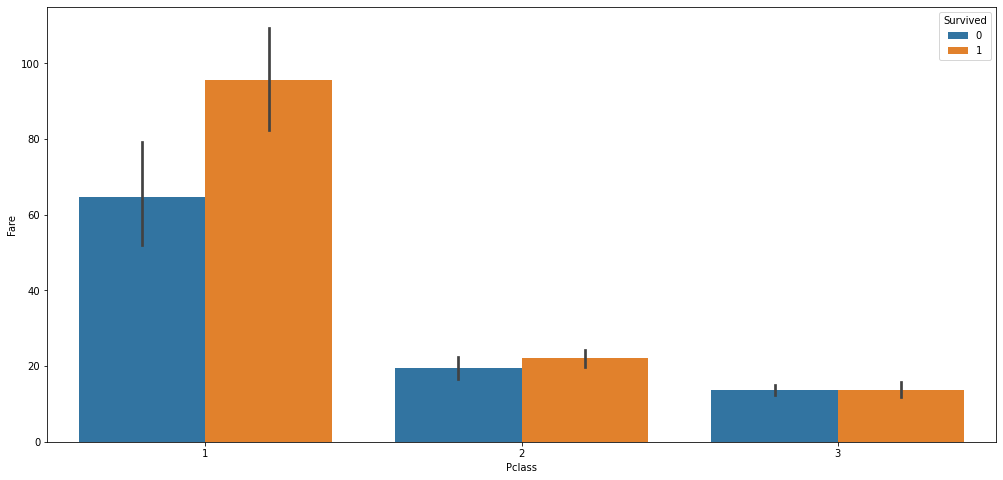

In [24]:
#x축 :Pclass  y축 : Fare  hue:Survived
sns.barplot(data=test, x ='Pclass', y='Fare', hue='Survived')

In [29]:
#요금이 500불 이상인 사람의 데이터
test[test.Fare > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### Q. 위 세명의 승객의 요금을 1/3로 수정하시오

In [32]:
test.loc[test.Fare>500, 'Fare']=512/3

### Q. 생존자/비생존자의 displot 그리기(요금)

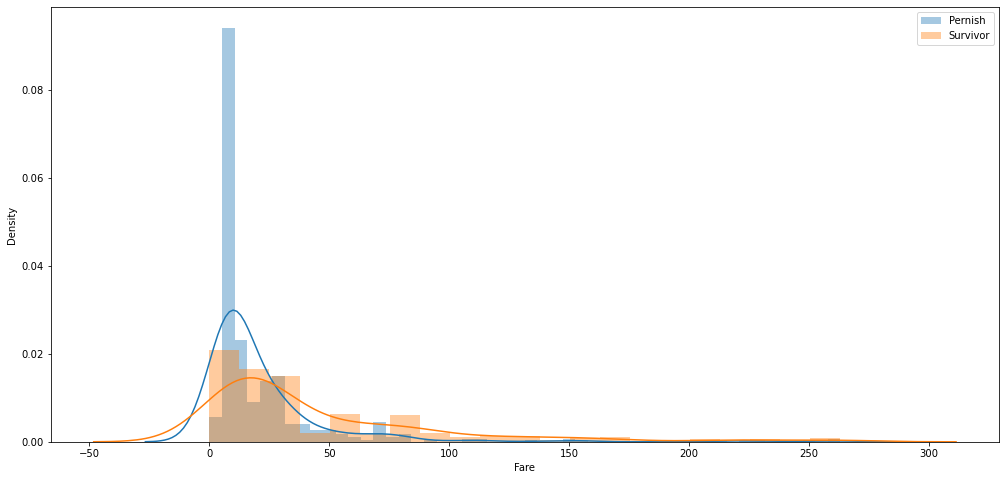

In [37]:
perish =test[test.Survived == 0]
survivor = test[test.Survived == 1]

sns.distplot(perish.Fare,label='Pernish')      
sns.distplot(survivor.Fare,label='Survivor') 
plt.legend()    #범례

# lmplot

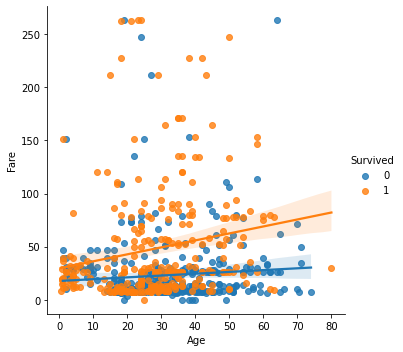

In [40]:
sns.lmplot(data=test, x='Age', y='Fare', hue='Survived')               # 소문자 ㅣ

<AxesSubplot:xlabel='Pclass', ylabel='count'>

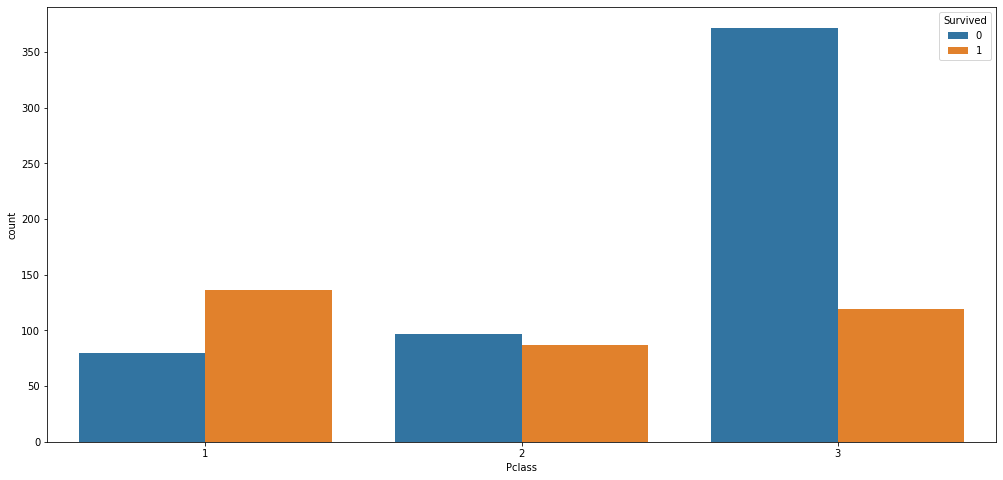

In [42]:
sns.countplot(data=test, x = 'Pclass',hue="Survived")

<AxesSubplot:xlabel='Parch', ylabel='count'>

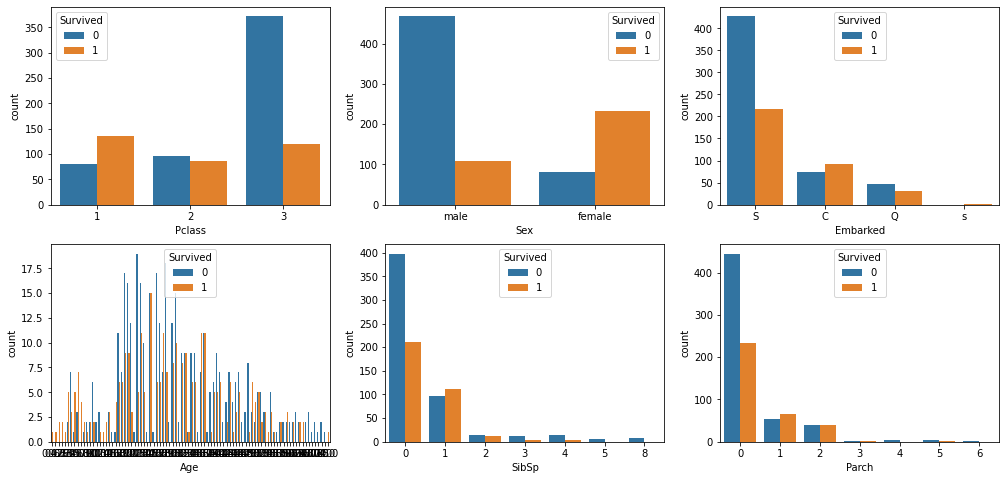

In [61]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)

sns.countplot(data=test, x='Pclass', hue='Survived',ax=ax1)
sns.countplot(data=test, x='Sex', hue="Survived" , ax=ax2)
sns.countplot(data=test, x='Embarked',hue="Survived" ,ax=ax3)
sns.countplot(data=test, x='Age', hue="Survived" ,ax=ax4)
sns.countplot(data=test, x='SibSp', hue="Survived" ,ax=ax5)
sns.countplot(data=test, x='Parch', hue="Survived" ,ax=ax6)

plt.savefig('titanic.pdf')

In [63]:
#Family_size라는 칼럼을 추가해주세요(SibSp, Parch 칼럼 합쳐서)
test['Family_size']=test.SibSp+test.Parch

In [64]:
test.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


### Q.Family_Size 가지고 0이면 Alone이라는 컬럼 1이라고 기록, 0이 아니면 Alone컬럼에 0이라고 기록해주세요

In [67]:
test.loc[test.Family_size == 0, 'Alone' ] = 1
test.loc[test.Family_size != 0, 'Alone' ] = 0
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0


<AxesSubplot:xlabel='Family_size', ylabel='count'>

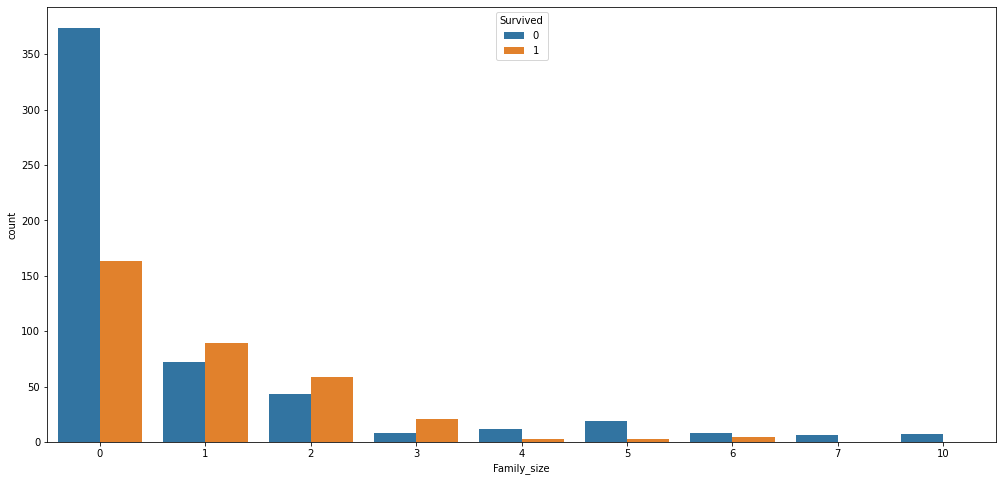

In [68]:
sns.countplot(data=test,x="Family_size", hue='Survived')